# Building Artificial Neural Network

- MNIST Dataset

### Step 1: Import the necessary libraries

In [2]:
!pip install tensorflow
!pip install keras

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 4.2/385.2 MB 21.0 MB/s eta 0:00:19
    --------------------------------------- 7.3/385.2 MB 18.1 MB/s eta 0:00:21
   - -------------------------------------- 9.7/385.2 MB 17.3 MB/s eta 0:00:22
   - -------------------------------------- 11.0/385.2 MB 13.2 MB/s eta 0:00:29
   - -------------------------------------- 12.1/385.2 MB 11.8 MB/s eta 0:00:32
   - -------------------------------------- 13.1/385.2 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 13.9/385.2 MB 9.5 MB/s eta 0:00:40
   - -------------------------------------- 14.9/385.2 MB 8.9 MB/s eta 0:00:42
   - -------------------------------------- 15.5/385.2 MB 8.5 MB/s eta 0:00:44
   - -------------------------------------- 16.0/385.2 MB 7.7 MB/s eta 0:00:49
   - -------------------------------------- 16.5/385.2 MB 7.1 MB/s eta 0:00:52
   - -------------------------------------- 17.0/385.2 MB

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

^C


### Step 2: Load and preprocess the MNIST dataset from mnist.csv

In [6]:
mnist_df = pd.read_csv('mnist.csv')
mnist_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_df["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
# Split the dataset into features (pixels) and labels (target)

features = mnist_df.drop('label', axis=1)
labels = mnist_df['label']

In [9]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0

In [10]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [11]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)

In [12]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

###  Build the ANN model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

###  Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

###  Train the model

In [10]:
model.fit(features, labels, epochs = 5)  # You can adjust the number of epochs

Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3336 - accuracy: 0.9025
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1622 - accuracy: 0.9512
Epoch 3/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1230 - accuracy: 0.9632
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0964 - accuracy: 0.9705
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0835 - accuracy: 0.9745


###  Make predictions

In [11]:
predictions = model.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

1313/1313 [==============================] - 2s 2ms/step


###  Visualize the results

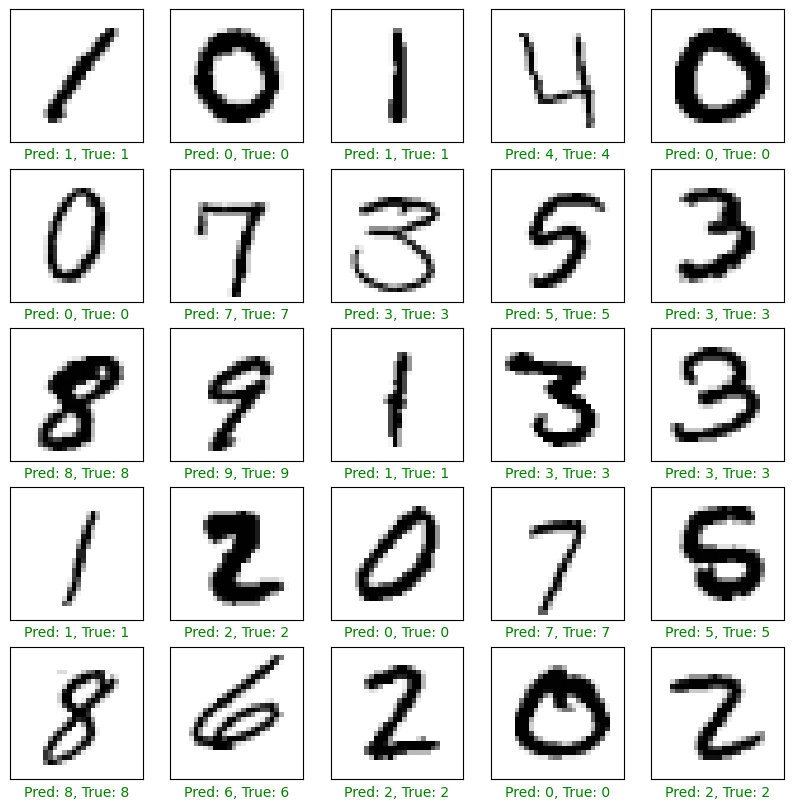

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()